# SOFTWARE LAB PROJECT PART II: Analysis of the marine animals trajectory

###### By `Akomoneh Raymond Anumaneh`, Supervised by `Prof. Nikolai Kornev` Univerisity of Rostock

This report is about the Visualization and characterization of marine animal trajectories. The Animals, Seals, were tracked with GPS devices and information relating to their location such as longitude and latitudes over time recorded. Parameters such as trajectories, mean speed, straightness index, Sinuosity and Fractal Dimension are of interest. Totally, 27 Seals were tracked but this analysis is done on 4 seals (G17, G20, S11, & S12) selected based on tracking duration. Longer durations were of interest because they provided more details and hence more meaningful analysis. It is worth mentioning that this report closely follows the work of [1] and most of the Methods and definitions are unedited while the Traja and Trajr documentations were also consulted. The First part of the Project was focused on cleaning the Data with python and plotting Trajectories with  with Traja a python Package developed by Justin Shenk and Rüdiger Busche

## CREATING TRAJECTORIES
 

Basically, the trajectory of an animal is the curve described by the animal 
when it moves. The sampling of the trajectory implies a step of discretization, 
that is the division of this continuous curve into a number of discrete “steps” connecting successive relocations of the animal [2]. Two main classes of trajectories can be distinguished: 
•	Trajectories of `type I` are characterized by the fact that the time is 
not precisely known or not taken into account for the relocations of the 
trajectory; 
•	  Trajectories of `type II` are characterized by the fact that time is 
known for each relocation.  
This report follows type II trajectories. 


## 3. Creating Trajectories with  the R-package `Trajr` 
 
The trajectory coordinates are read from a data file such as a CSV file, and then passed in to the TrajFromCoords function of Trajr to create the trajectory.

`TrajFromCoords` assumes that the first column in `mycoords_G17` contains `X` values, the second contains `Y` values, and the third column contains an optional `time` variable. This can be called by setting the `timeCol` argument of  the trajectory to the respective time coordinate in `Coords_G17`.  `Coords_G17` could be a DataFrame or a series.

While trajectories have been modelled in various ways, `trajr` works with two theoretical models: correlated random walks in which the turning angle of each step is the direction of the previous step ± some error; and directed walks, or compass-based navigation, in which the angular errors at each step are added to the “ideal” or compass direction. Trajr generally assumes correlated random walks, but provides some support for directed walks [1]. 



In [1]:
getwd()

[1] "C:/Users/aakom/OneDrive/Desktop/TOSHIBA/SOFTWARE LAB PROJECT/SOFTWARE LAB/Trajr"

In [2]:
#Looad Trajr Library
install.packages("trajr")
library("trajr")

package 'trajr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aakom\AppData\Local\Temp\Rtmp2HIuuh\downloaded_packages


Warning message:
"package 'trajr' was built under R version 3.6.3"

### a. Trajectory of Seal `G17`

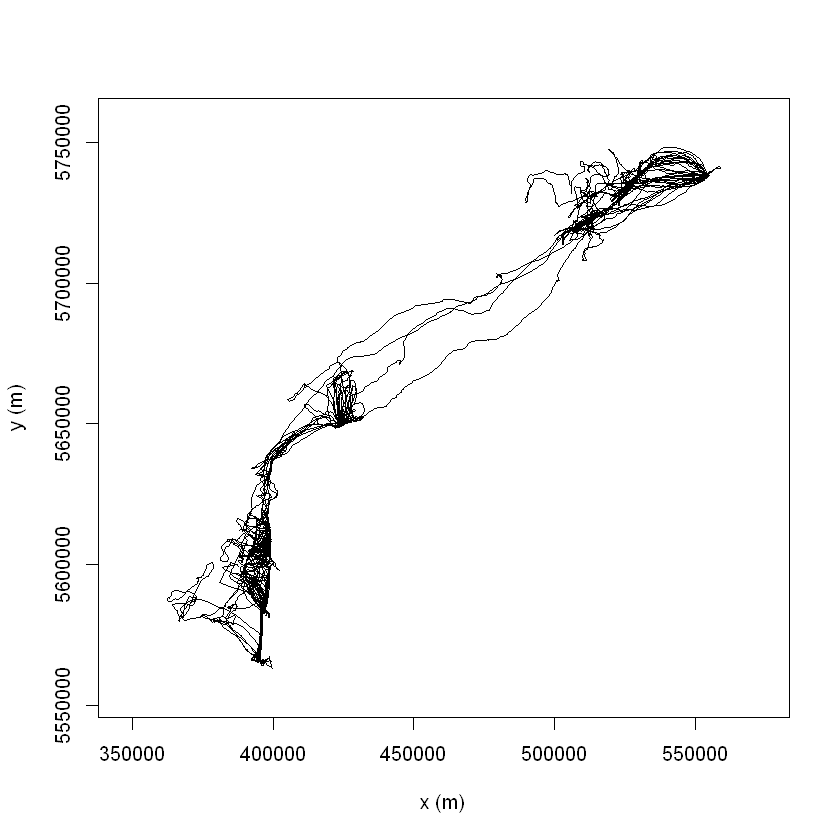

In [3]:
# Create a trajectory from the coordinates
# Read the data
df_G17 = read.csv("Seal_G17.csv")
# Select necessary columns
G17_df = df_G17[, c("X", "Y", "time.sec_cumsum")]
#Create the Trajectory
trajrG17 = TrajFromCoords(G17_df, xCol ="X", yCol = "Y", timeCol = "time.sec_cumsum", spatialUnits = "m", timeUnits = "s")
#Plot the trajectory
plot(trajrG17)

### b. Trajectory of Seal `G20`

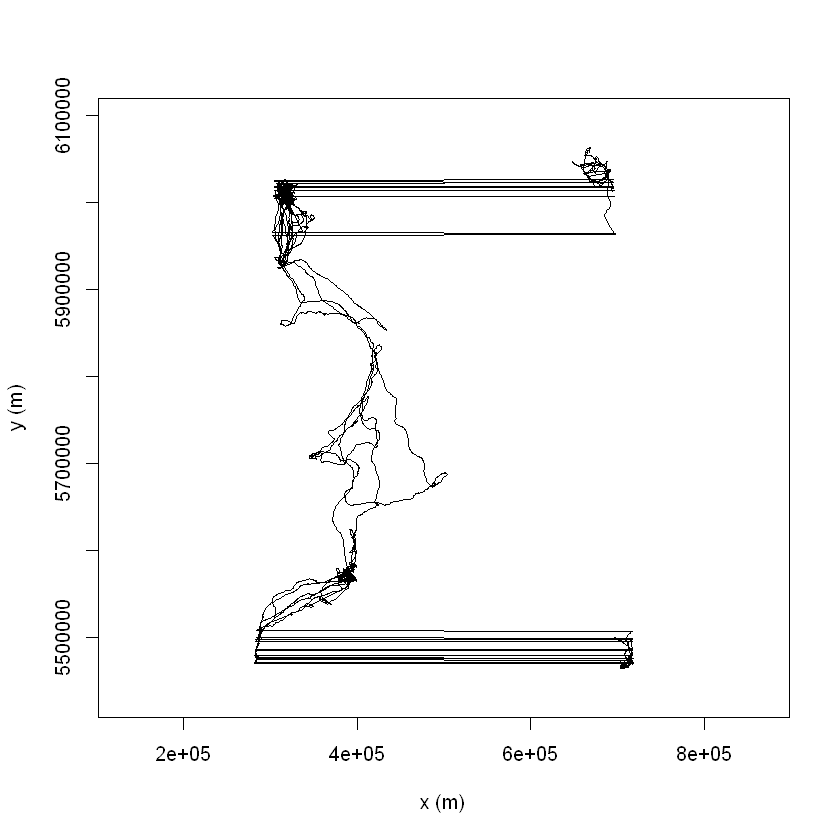

In [4]:
df_G20 = read.csv("Seal_G20.csv")
G20_df = df_G20[, c("X", "Y", "time_sum")]

trajrG20 = TrajFromCoords(G20_df, xCol ="X", yCol = "Y", timeCol = "time_sum", spatialUnits = "m", timeUnits = "s")
plot(trajrG20)

_The horizontal lines results from the projection from latitude and longitude to Universal Transverse Mercator (UTM)  XY and will greatly affect the calculaations later_

### c. Trajectory of Seal `S11`

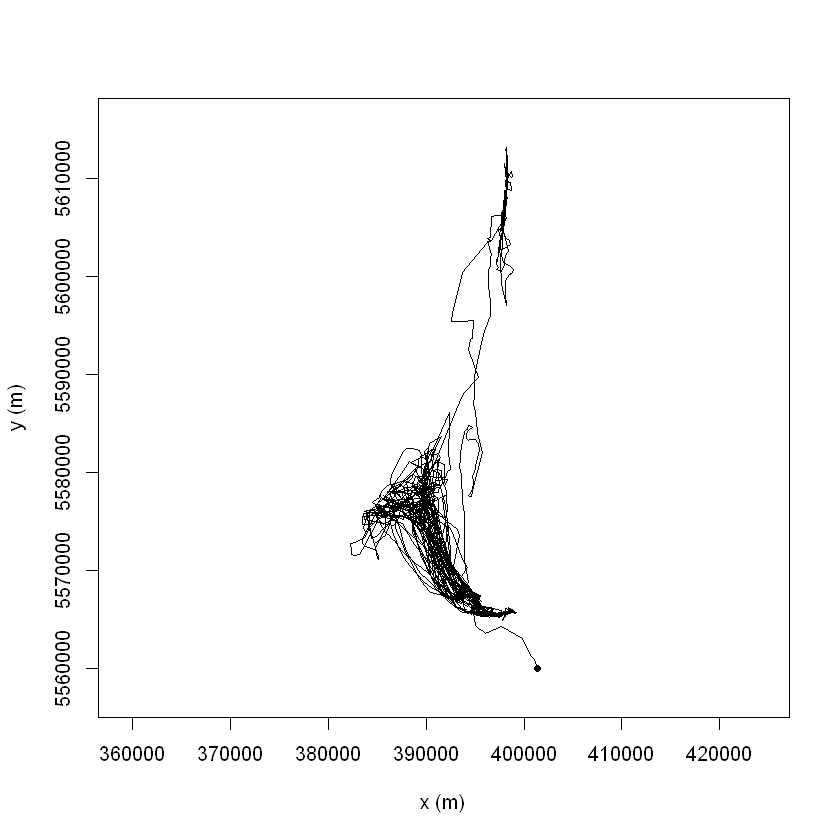

In [5]:
S11 = read.csv("Seal_S11.csv")
S11_df = S11[, c("X", "Y", "time_sum")]
trajS11 = TrajFromCoords(S11_df, xCol ="X", yCol = "Y", timeCol = "time_sum", spatialUnits = "m", timeUnits = "s")
plot(trajS11)

### d. Trajectory of Seal `S12`

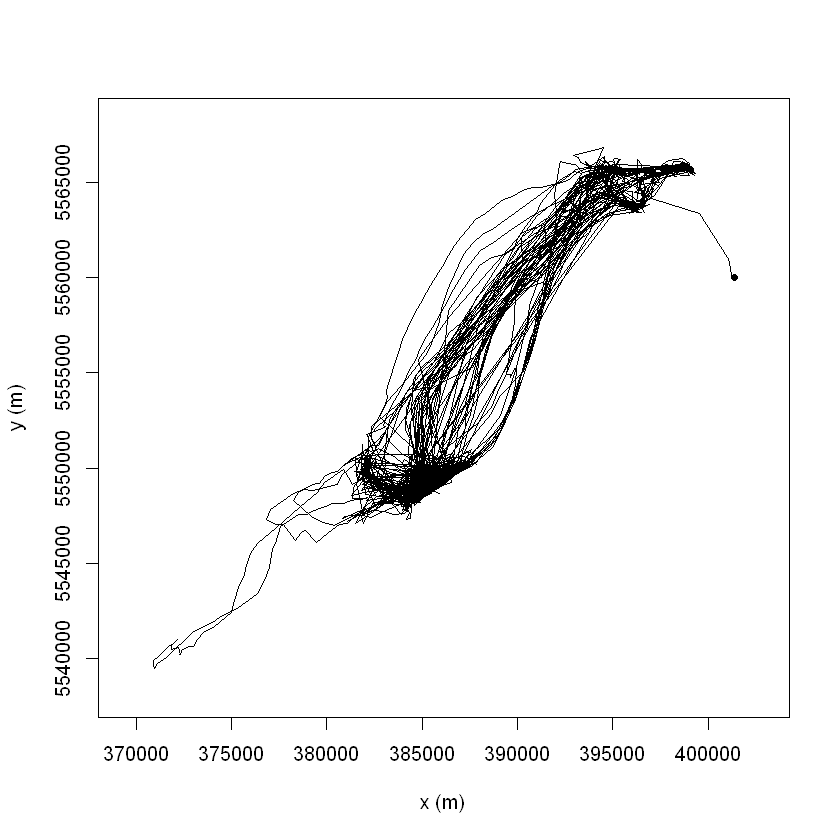

In [6]:
S12 = read.csv("Seal_S12.csv")
S12_df = S12[, c("X", "Y", "time_sum")]
trajS12 = TrajFromCoords(S12_df, xCol ="X", yCol = "Y", timeCol = "time_sum", spatialUnits = "m", timeUnits = "s")
plot(trajS12)

## Some basic trajr parameters
Adapted from [1]

|Parameter||Description| 
|:---||:---|
|TrajGetNCoords||Returns the number of coordinates of a trajectory| 
|TrajLength||Returns the total length of the trajectory| 
|TrajDistance||Returns the straight-line distance from the start to the end of the trajectory| 
|TrajDuration||Returns the duration of the trajectory|
|TrajMeanVelocity||Returns the mean velocity vector of the trajectory| 
|TrajMeanVectorOfTurningAngles||Returns the mean vector of the turning angles|
|TrajExpectedSquareDisplacement||Returns the expected square displacement of a correlated random walk| 


## 4. TRAJECTORY ANALYSIS
 
Analysis may be divided into measures of speed or acceleration, and measures of straightness or tortuosity. 


#### Smoothing trajectories e.g. `S12`

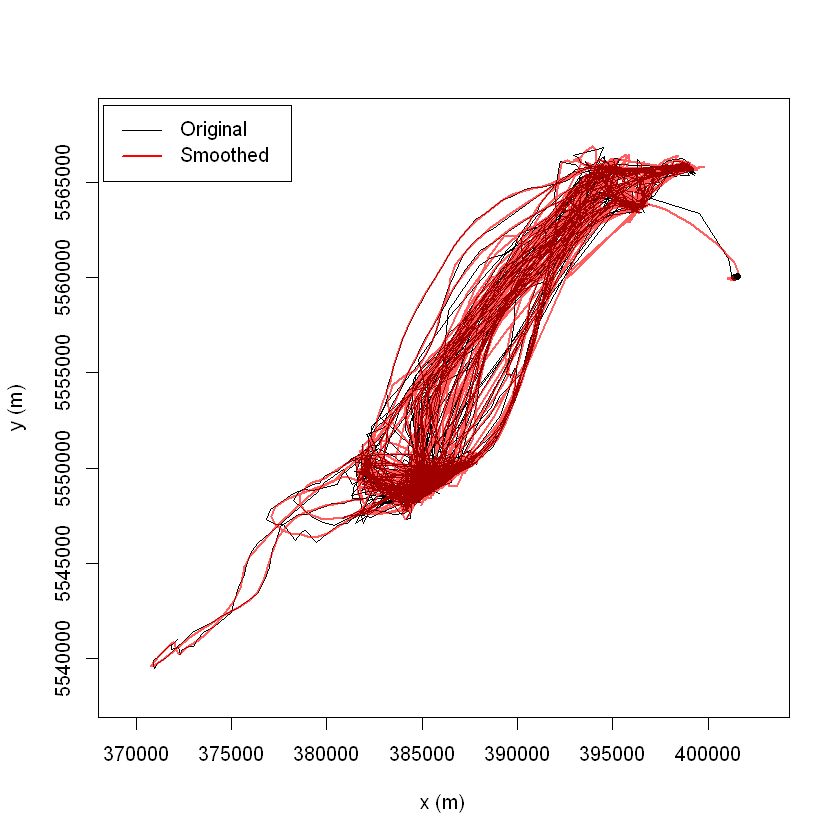

In [7]:
# Plot original trajectory
plot(trajS12, lwd = 1, lty = 1)

# Create a smoothed trajectory, filter order 5, length 13
smoothedS12 <- TrajSmoothSG(trajS12, p = 5, n = 13)

# Plot it in slightly transparent red
lines(smoothedS12, col = "#FF0000A0", lwd = 2)

legend("topleft", c("Original", "Smoothed"), lwd = c(1, 2), lty = c(1, 1), col = c("black", "red"), inset = 0.01)

In [8]:
smoothedG17 <- TrajSmoothSG(trajrG17, p = 5, n = 13)

smoothedG20 <- TrajSmoothSG(trajrG20, p = 5, n = 13)

smoothedS11 <- TrajSmoothSG(trajS11, p = 5, n = 13)


### 4.1 Speed and Acceleration 

The `TrajDerivatives` function calculates linear speed and acceleration along a Trajectory. Traja recommends `smoothing` of noisy trajectories before the derivatives are calculated. 

In [10]:
#Get the derivatives from the trajectory
deriv_G17 <- TrajDerivatives(smoothedG17)

deriv_G20 <- TrajDerivatives(smoothedG20)

deriv_S12 <- TrajDerivatives(smoothedS12)

deriv_S11 <- TrajDerivatives(smoothedS11)

In [16]:
cat("Seal G17 has a minimum speed of:",min(deriv_G17$speed),"\n", "a maximum speed of : ",max(deriv_G17$speed), "\n", "a mean speed of:",mean(deriv_G17$speed),"\n", "and a Standard deviation of:",sd(deriv_G17$speed),"\n","\n")

cat("Seal G20 has a minimum speed of:",min(deriv_G20$speed),"\n", "a maximum speed of:",max(deriv_G20$speed),"\n", "a mean speed of:",mean(deriv_G20$speed),"\n", "and a Standard deviation of:",sd(deriv_G20$speed),"\n","\n")

cat("Seal S11 has a minimum speed of:",min(deriv_S11$speed),"\n", "a maximum speed of:",max(deriv_S11$speed),"\n", "a mean speed of:",mean(deriv_S11$speed),"\n", "and a Standard deviation of:",sd(deriv_S11$speed),"\n","\n")

cat("Seal S12 has a minimum speed of:",min(deriv_S12$speed),"\n", "a maximum speed of:",max(deriv_S12$speed),"\n", "a mean speed of:",mean(deriv_S12$speed),"\n", "and a Standard deviation of:",sd(deriv_S12$speed),"\n","\n")

Seal G17 has a minimum speed of: 5.138463e-05 
 a maximum speed of :  4.095574 
 a mean speed of: 0.5355325 
 and a Standard deviation of: 0.517299 
 
Seal G20 has a minimum speed of: 0.0002050005 
 a maximum speed of: 205.4051 
 a mean speed of: 1.823741 
 and a Standard deviation of: 10.57831 
 
Seal S11 has a minimum speed of: 7.847989e-05 
 a maximum speed of: 3.919916 
 a mean speed of: 0.5464885 
 and a Standard deviation of: 0.5967173 
 
Seal S12 has a minimum speed of: 0.0009432774 
 a maximum speed of: 6.288814 
 a mean speed of: 0.5105534 
 and a Standard deviation of: 0.6378958 
 


This results show that the average speed across the four seals is about 0.4m/s. 
_Some values of Seal G17 are suspiciously incorrect due to the erroneous projection from latitude and longitude to UTM XY._

### 4.2 Straightness 

The concept of `tortuosity` (or conversely, straightness) is intuitively an important characteristic of trajectories that is inversely related to the efficiency of navigation towards a destination and controls local searching intensity [5].  
This characteristic is also valuable in locomotor mimicry studies, allowing   verification of whether a mimic displays a tortuous path to resemble its model, even though moving in a straight line would have allowed it to reach its destination faster. 
Various methods to measure the straightness of trajectories exist and some are available within trajr. The simplest is `D/L`, where `D` is the beeline distance between the first and last points in the trajectory, and `L` is the path length travelled [6]. This straightness index is calculated by the Trajr function `TrajStraightness`, and is a number ranging from `0` to `1`, where 1 indicates a straight line.  [5] considers the straightness index to be a reliable measure of the efficiency of a directed walk, but inapplicable to random trajectories. [6] considers this straightness index to be an approximation of r, which is the length of the mean vector of turning angles after discretizing to a constant step length. r can be calculated by calling   `Mod(TrajMeanVectorOfTurningAngles(trj))`, assuming trj is a Trajectory with constant step length. 


In [20]:
straightness_G17 <- TrajStraightness(trajrG17)

straightness_G20 <- TrajStraightness(trajrG20)

straightness_S11 <- TrajStraightness(trajS11)

straightness_S12 <- TrajStraightness(trajS12)

In [35]:
cat("straightness_G17 is:",straightness_G17,"\n","straightness_G20 is:",straightness_G20,"\n","straightness_S11 is:",straightness_S11,"\n","straightness_S12 is:",straightness_S12,"\n")


straightness_G17 is: 0.01211636 
 straightness_G20 is: 3.045027e-05 
 straightness_S11 is: 0.005938884 
 straightness_S12 is: 0.002424941 


_Again, the value of Seal G17 is suspiciously incorrect due to the erroneous projection from latitude and longitude to UTM XY._

### 4.3 Sinuosity 
 
The `sinuosity index` defined by [5] may be an appropriate measure of the tortuosity of a random search path. Sinuosity is a function of the mean cosine of turning angles, and is a corrected form of the original sinuosity index defined by [7].  
The function `TrajSinuosity2` calculates the corrected form while TrajSinuosity calculates the original index. Sinuosity is calculated for a trajectory with a constant step length, so trajectories may first require rediscretization. In the absence of a biologically meaningful step size, discretizing to the mean step length of the trajectory will produce a trajectory with approximately the same shape and number of steps as the original [1].


In [36]:
sine_G17 <- TrajSinuosity(trajrG17) 
sine2_G17  <- TrajSinuosity2(trajrG17)

sine_G20 <- TrajSinuosity(trajrG20)
sine2_G20  <- TrajSinuosity2(trajrG20)

sine_S11 <- TrajSinuosity(trajS11)
sine2_S11  <- TrajSinuosity2(trajS11)

sine_S12 <- TrajSinuosity(trajS12)
sine2_S12  <- TrajSinuosity2(trajS12)

In [37]:
cat("sine_G17 is:",sine_G17," and sine2_G17 is:",sine2_G17,"\n")
cat("sine_G20 is:",sine_G20," and sine2_G20 is:",sine2_G20,"\n")
cat("sine_S11 is:",sine_S11," and sine2_S11 is:",sine2_S11,"\n")
cat("sine_S12 is:",sine_S12," and sine2_S12 is:",sine2_S12,"\n")

sine_G17 is: 0.06963966  and sine2_G17 is: 0.04535277 
sine_G20 is: 0.03585707  and sine2_G20 is: 0.004137565 
sine_S11 is: 0.06724543  and sine2_S11 is: 0.04118568 
sine_S12 is: 0.07446661  and sine2_S12 is: 0.03928555 


With remarkable improvement due to the correction introduced  by `Sinuosity2`, both values are low. This means that the cosine of the turning angles is small and since the cosine of the turning angles is small, it in turn means that the turning angles are closer to 90 degrees. However, more details can be revealed if the timing is reduced from an average of 10minutes to 10 seconds. It is possible to obtain completely different results with such changes.

### 4.4 E-max 
 
`Emax`, the `maximum expected displacement`, is a single-valued measure of straightness defined by [8]. `Emax-a` is a dimensionless, scale-independent measure of the maximum possible expected displacement. `Emax-b` is Emax-a * mean step length, and gives the maximum possible expected displacement in spatial units [1]. Values closer to `0` are more sinuous, while larger values (approaching infinity) are straighter. 


In [38]:
EmaxA_Unsmoothed_G17 <- TrajEmax(trajrG17, eMaxB = FALSE)
EmaxA_Unsmoothed_G20 <- TrajEmax(trajrG20, eMaxB = FALSE)
EmaxA_Unsmoothed_S11 <- TrajEmax(trajS11, eMaxB = FALSE)
EmaxA_Unsmoothed_S12 <- TrajEmax(trajS12, eMaxB = FALSE)

EmaxA_smoothed_G17 <- TrajEmax(smoothedG17, eMaxB = FALSE)
EmaxA_smoothed_G20 <- TrajEmax(smoothedG20, eMaxB = FALSE)
EmaxA_smoothed_S11 <- TrajEmax(smoothedS11, eMaxB = FALSE)
EmaxA_smoothed_S12 <- TrajEmax(smoothedS12, eMaxB = FALSE)

EmaxB_smoothed_G17 <- TrajEmax(smoothedG17, eMaxB = TRUE)
EmaxB_smoothed_G20 <- TrajEmax(smoothedG20, eMaxB = TRUE)
EmaxB_smoothed_S11 <- TrajEmax(smoothedS11, eMaxB = TRUE)
EmaxB_smoothed_S12 <- TrajEmax(smoothedS12, eMaxB = TRUE)

In [43]:
cat("EmaxA_Unsmoothed_G17 is:",EmaxA_Unsmoothed_G17,"    EmaxA_smoothed_G17 is:",EmaxA_smoothed_G17, "   and EmaxB_smoothed_G17 is:",EmaxB_smoothed_G17,"\n")
cat("EmaxA_Unsmoothed_G20 is:",EmaxA_Unsmoothed_G20,"  EmaxA_smoothed_G20 is:",EmaxA_smoothed_G20, "   and EmaxB_smoothed_G20 is:",EmaxB_smoothed_G20,"\n")
cat("EmaxA_Unsmoothed_S11 is:",EmaxA_Unsmoothed_G17,"    EmaxA_Unsmoothed_S11 is:",EmaxA_smoothed_S11, " and EmaxB_smoothed_S11 is:",EmaxB_smoothed_S11,"\n")
cat("EmaxA_Unsmoothed_S12 is:",EmaxA_Unsmoothed_S12," EmaxA_smoothed_S12 is:",EmaxA_smoothed_S12, "   and EmaxB_smoothed_S12 is:",EmaxB_smoothed_S12,"\n")

EmaxA_Unsmoothed_G17 is: 1.0442     EmaxA_smoothed_G17 is: 3.726176    and EmaxB_smoothed_G17 is: 1615.625 
EmaxA_Unsmoothed_G20 is: 1.345194   EmaxA_smoothed_G20 is: 3.918078    and EmaxB_smoothed_G20 is: 6374.979 
EmaxA_Unsmoothed_S11 is: 1.0442     EmaxA_Unsmoothed_S11 is: 2.461042  and EmaxB_smoothed_S11 is: 1351.491 
EmaxA_Unsmoothed_S12 is: 0.4805549  EmaxA_smoothed_S12 is: 2.018683    and EmaxB_smoothed_S12 is: 985.346 


## 5. FRACTAL DIMENSION CALCULATION
 
`Fractal dimension` has been considered a promising measure of straightness or tortuosity, varying between 1 (straight line movement) and 2 (Brownian motion). However, several studies have found it inappropriate for use with animal trajectories, as animal trajectories are not fractal curves, and the fractal dimension of a non-fractal curve depends critically on the range of step sizes used to calculate it [2], [9]. Nonetheless, fractal dimension continues to be used, and the `TrajFractalDimension` function, by default, calculates fractal dimension using the `modified dividers method` to account for truncation error [9]. This method is rather too slow and the results herein presented were obtained by running this function on the entire Data of each trajectory. Some of the arguments of this function include: `Trj`: the trajectory to calculate fractal dimension for,  `stepSizes`: a vector of step sizes (aka divider sizes) used to calculate path lengths, `adjustD`:[TRUE or FALSE].	If TRUE, path length is adjusted for truncation error [9].  And `dMean`:[TRUE or FALSE].	If TRUE, the fractal dimension is calculated starting from the beginning of the trajectory, then re-calculated starting from the end and moving backwards. The value returned is the mean of the two fractal dimensions [9], [10].
The `“stepSizes”` argument,  that affects the results to a large extent has been chosen to coincide with the overall mean step sizes for all four trajectories in this primary calculation. This was then applied independently across each trajectory. The results presented below shows that  all the seals being investigated follow a straight line movement. However, a close look at a stochastic section of trajectory G17 reveals some interesting information on the Fractal Dimension of G17.


|Seal||Fractal Dimension|
|---||:----:|
|G17||1.119366|
|G20||1.049446|
|S11||1.113465|
|S12||1.119362|


### 5.1 Testing For a Fractal Curve

As described in `trajr documentation` [10], it is possible to test whether a trajectory is a fractal curve for a range of step sizes using the `TrajFractalDimensionValues` function. If the plotted points have a tendency to lie on a straight line (see figure below), then the trajectory is a fractal curve for that range of step sizes. However, according to same document, typical trajectories will result in a curve rather than a straight line. The example code provided in [10] demonstrates how to plot path length for a range of step sizes. Figure 3.1 below is the result obtained by applying this test to a stochastic section of trajectory `G17` shown in figure below. The `stepSizes` argument was varied to get a plot that was almost `linear` from where the final step size was selected and used to compute the Fractal Dimension. The code that follows that a Fractal Dimension Value of  about `1.5` could be obtained by picking a range of Stepsizes from the “linear” section of the figure.  One way to get Fractal Dimension from this plot is to find a straight line that connects most of the points in the linear region and get the slope of the line but a different much simpler approach will be used in the following section.

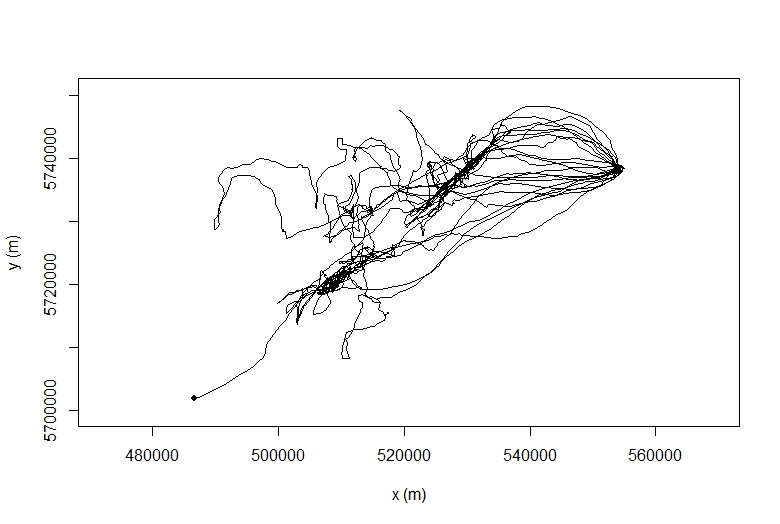

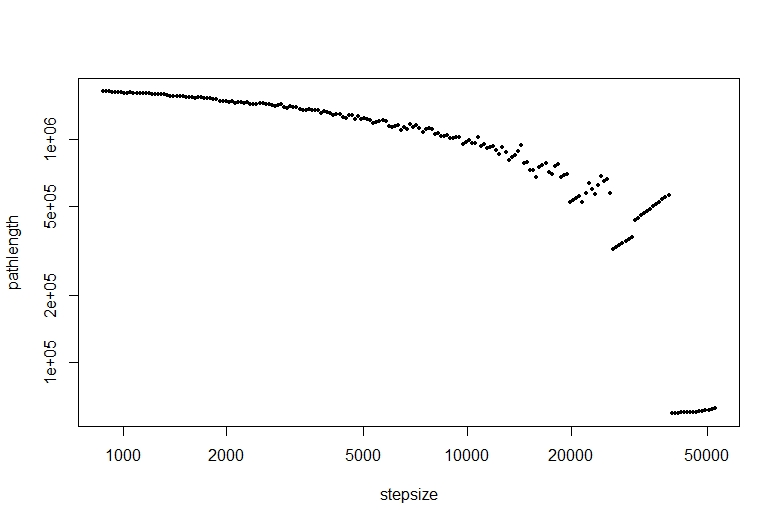

### 5.2 Variation of Fractal Dimension with Step sizes

In order to understand the relationship between `Fractal Dimension` and `Stepsizes`, these two quantities have been plotted in figure below.  
A range of step sizes were picked from the “linear” region of figure and assigned to a vector called sizes. FractalDimension is initialized to a `Null vector` and a `for loop` is used to compute its value using the `TrajFractalDimension` algorithm from `Trajr` library (see code below) for each step size. A plot is made of these two quantities as shown in figure below. Again this is not straight line because of the errors incurred as the step size approaches zero. A `straight line` is imposed on this plot using the red dotted lines as shown below. The Fractal Dimension value is the `intersection` of this dotted red line with the FractalDimension axis. The value obtained is almost equal to the one obtained through computation with the TrajFractalDimension function.


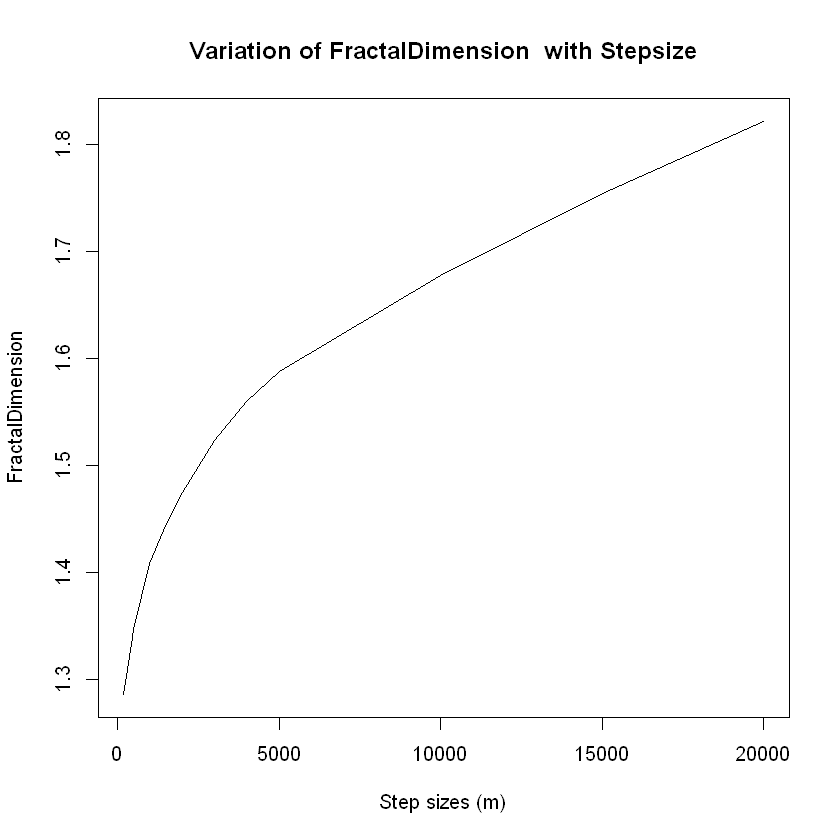

In [49]:
# Vector of Step sizes 
sizes = c(200, 300, 450, 500, 1000, 1500, 2000, 3000, 4000, 5000, 10000, 15000, 20000)
# Assign FractalDimension to a NULL vector
FractalDimension = c()
#for loop: using each step size from sizes, compute FractalDimension and append results to FractalDimension vector assigned above.
for (i in sizes) { 
  stepSizes <- TrajLogSequence(i, 120*450, 200)
  Fractal <- TrajFractalDimension(trajrG17, stepSizes, adjustD = TRUE, dMean = TRUE)
  FractalDimension <- append(FractalDimension, Fractal)
}
# Make a plot of FractalDimension against the stepsizes
plot(sizes, FractalDimension, type="l", xlab="Step sizes (m)", ylab="FractalDimension", 
     main="Variation of FractalDimension  with Stepsize")


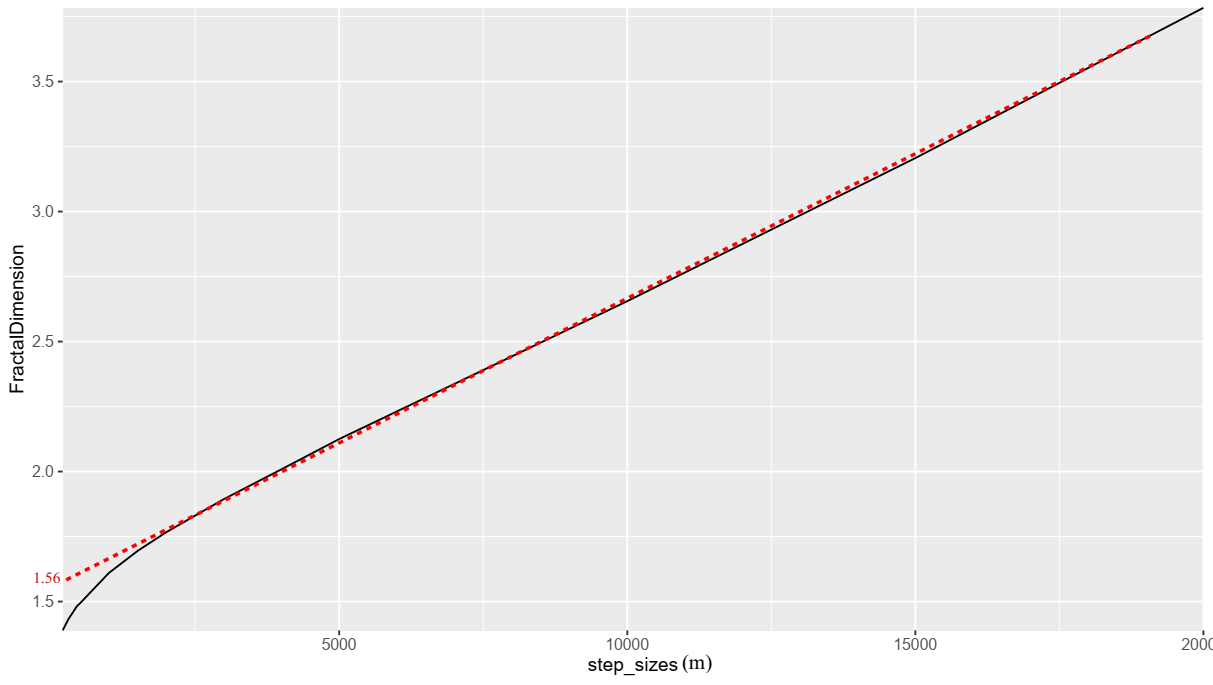

## 6. Conclusion

This report has presented the analysis and visualization of the trajectories of four Seals. Throughout the analysis, results obtained have been presented in a way that permits a direct comparism of the key aspects being examined.
 The average speed across the four seals was found to be about 0.4m/s. None of the trajectories was straight. The so-called “biologically meaningful” step size,  was interpreted to be the mean step length of the four trajectories.
Corrections introduced  by Sinuosity2 lead to improved results compared to Sinuosity1 whereas both values were found to be low. Since the values were low, the cosine of the turning angles were small, meaning that the turning angles were closer to 90 degrees. However, these results can be challenged if the average timing in between steps is reduced from 10 minutes to 10 seconds.
The stochastic section of trajectory G17 passed the Fractal test and this test provided firsthand information that led to the computation of it Fractal Dimension. The Fractal Dimension value obtained through computation using TrajFractalDimension function and meaningful step size and the final value obtained by varying the Fractal Dimension with step size were almost equal. Therefore one may serve as a verification to the other.
Through out this project, Fractal Dimension was computed using the modified dividers method that minimizes truncation error. This method is however too slow. For future works, similar methods such as the Box-Counting method could be used and the results compared.


## 7. References

[1] 	. D. McLean and V. M. Skowron , "trajr: An R package for Characterisation of Animal Trajectories," Ethology, pp. 124:440-448, 2018. 

[2] 	P. Turchin, "Fractal Analyses of Animal Movement: A Critique," Ecology, no. 77(7), pp. 2086-2090, 1996. 

[3] 	J. Shenk, " A Python Trajectory Analysis Library pypi.org," 2009. [Online]. Available: https://pypi.org/project/traja/. [Accessed 22 08 2020].

[4] 	B. V. Tobias B., V. A. Bart and I. B. Torstein , "Bidirectional UTM-WGS84 converter for python," 2012. [Online]. Available: https://github.com/Turbo87/utm. [Accessed 11 8 2020].

[5] 	S. Benhamou, "How to reliably estimate the tortuosity of an animal's path," Journal of Theoretical Biology, vol. 2, no. 229, pp. 209-220, 2004. 

[6] 	E. Batschelet, "Circular statistics in biology," ACADEMIC PRESS, p. 388, 1981. 

[7] 	P. Bovet and Benhamou, S., "Spatial analysis of animals' movements using a correlated random walk model," Journal of Theoretical Biology, vol. 4, no. 131, pp. 419-433, 1988. 

[8] 	Cheung, A., Zhang, S., Stricker, C. and Srinivasan, M. V., "Animal navigation: the difficulty of moving in a straight line," Biological Cybernetics, vol. 1, no. 97, pp. 47-61, 2007. 

[9] 	N. VO., " Improving accuracy and precision in estimating fractal dimension of animal," Acta Biotheor, vol. 1, no. 54, pp. 1-11, 2006. 

[10] 	J. McLean, "Package ‘trajr’: Animal Trajectory Analysis," 2019.

[11] 	Veronica D. and Erik D., "Fractal Analysis Can Explain Individual Variation in Dispersal Search Paths," Wiley, vol. 85, no. 5, pp. 1428-1438, 2004. 

[12] 	B. Mandelbrot, "How long is the coast of Britain? Statistical selfsimilarity and fractional dimension," Science, vol. 156, no. 3775, p. 636–638, 1967. 